## 新能源电动汽车动力电池充电能量预测（六）——训练模型及预测

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from datetime import date, datetime
from package import utils
import time

### 定义数据处理的类型：1.with_fill（使用填充数据）；2.without_fill（不使用填充数据）

In [2]:
type = 1

### 导入训练数据集

In [3]:
# 导入训练集
dataset_train = pd.read_csv('./energy_predict_data/data_prehandle/5_data_split/train/train_%s.csv' % utils.getType(type))
# 数据字段
header = dataset_train.columns.values.tolist()
# 数据描述
pd.set_option('precision', 2)
dataset_train.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,4484.00,4.48e+03,4.48e+03,4484.00,4484.00,4484.00,4484.00,4484.00,4484.00,4484.00,4477.00,4484.00,4477.00,4484.00,4484.00,4484.00,4484.00
mean,11.37,2.02e+13,2.02e+13,7150.37,98427.96,102.83,34.54,75.39,40.85,405.75,436.77,-43.88,-22.75,24.93,12.72,12.23,26.15
std,6.45,4.31e+09,4.30e+09,8418.98,29671.80,65.48,19.35,28.48,22.66,92.12,88.21,48.14,35.78,10.01,10.35,9.26,21.00
min,1.00,2.02e+13,2.02e+13,600.00,45631.70,0.00,0.00,4.80,0.40,252.30,0.00,-202.00,-400.00,-2.00,-7.00,0.00,0.22
25%,5.00,2.02e+13,2.02e+13,2170.00,74701.00,62.90,19.20,40.00,22.00,339.60,374.50,-60.40,-21.90,16.00,4.00,7.00,12.98
50%,11.00,2.02e+13,2.02e+13,3870.00,90477.65,93.50,33.00,88.26,39.60,361.40,392.40,-24.20,-11.50,27.00,10.00,10.00,19.81
75%,17.00,2.02e+13,2.02e+13,5920.00,117295.25,133.00,45.00,100.00,61.20,533.80,554.20,-9.10,-5.00,33.00,23.00,13.00,30.13
max,21.00,2.02e+13,2.02e+13,59960.00,170134.00,490.00,96.00,108.49,99.00,574.60,604.70,-0.10,8.00,49.00,41.00,48.00,103.72


### 导入测试数据集

In [4]:
# 导入测试集
dataset_test = pd.read_csv('./energy_predict_data/data_prehandle/5_data_split/test/test_%s.csv' % utils.getType(type))
# 数据描述
pd.set_option('precision', 2)
dataset_test.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,1506.00,1.51e+03,1.51e+03,1506.00,1506.00,1506.00,1506.00,1506.00,1506.00,1506.00,1503.00,1506.00,1503.00,1506.00,1506.00,1506.00,1506.00
mean,11.37,2.02e+13,2.02e+13,7261.55,118952.06,100.59,38.66,80.04,41.38,406.52,434.21,-43.31,-21.05,33.95,22.49,11.48,25.30
std,6.45,1.22e+09,1.22e+09,8210.35,29011.07,62.40,19.08,20.75,21.40,89.76,86.91,48.46,34.05,9.46,11.84,11.75,21.92
min,1.00,2.02e+13,2.02e+13,600.00,75285.20,0.00,1.00,11.00,0.00,277.80,0.00,-202.00,-300.00,3.00,-2.00,0.00,0.42
25%,5.00,2.02e+13,2.02e+13,2160.00,93429.15,63.30,23.00,72.76,24.00,342.20,374.60,-54.08,-18.40,30.00,15.00,6.00,11.65
50%,11.00,2.02e+13,2.02e+13,3843.50,114175.00,93.00,36.00,86.00,40.00,361.80,388.30,-24.00,-8.50,35.00,26.00,8.00,18.86
75%,17.00,2.02e+13,2.02e+13,8391.00,136668.00,130.75,52.00,98.00,60.52,533.60,548.00,-9.00,-5.00,40.00,31.00,10.00,28.27
max,21.00,2.02e+13,2.02e+13,44535.00,182536.00,441.40,93.00,110.49,95.00,571.00,601.40,-0.10,3.90,52.00,46.00,51.00,101.30


In [5]:
dataset_train.isnull().sum()

vehicle_id           0
charge_start_time    0
charge_end_time      0
charge_duration      0
mileage              0
delta_mileage        0
charge_start_soc     0
charge_end_soc       0
charge_delta_soc     0
charge_start_U       0
charge_end_U         7
charge_start_I       0
charge_end_I         7
charge_max_temp      0
charge_min_temp      0
charge_delta_temp    0
charge_energy        0
dtype: int64

### 特征选取

In [6]:
features = ['charge_duration', 
            'delta_mileage',
            'charge_start_soc', 
            'charge_delta_soc', 
            'charge_end_soc',
            'charge_start_U',
            'charge_start_I',
            'charge_delta_temp']
label = header[16]
features, label

(['charge_duration',
  'delta_mileage',
  'charge_start_soc',
  'charge_delta_soc',
  'charge_end_soc',
  'charge_start_U',
  'charge_start_I',
  'charge_delta_temp'],
 'charge_energy')

### 构造特征集合和输出集合

In [7]:
X_train, y_train = dataset_train[features], dataset_train[label]
X_test, y_test = dataset_test[features], dataset_test[label]

### 创建训练后的预测值数据集

In [8]:
data_pred = pd.DataFrame()
data_pred['vehicle_id'] = dataset_test['vehicle_id'].tolist()
data_pred['type'] = type

### 标准化

In [9]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))

# 按训练集数据分布对测试集进行数据标准化
X_test = scaler.transform(X_test.astype(np.float64))

### 特征选择

In [10]:
#导入sklearn库中的VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
#设置方差的阈值为0.08
sel = VarianceThreshold(threshold=0.08)
#选择方差大于0.08的特征
X_sel = sel.fit_transform(X_train.astype(np.float64))

### 训练模型

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


evaluation of model- LinearRegression
MSE: 64.532006063
RMSE: 64.532006063
MAE: 5.78186375679
RANK: 116.549278003
ACC: 0.188281824674
R2: 0.865641044566


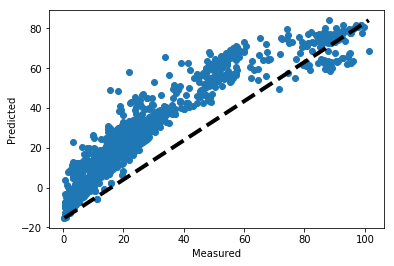

evaluation of model- LinearSVR
MSE: 67.6857836262
RMSE: 67.6857836262
MAE: 5.01149635338
RANK: 57.7591551593
ACC: 0.532744327016
R2: 0.859074717484


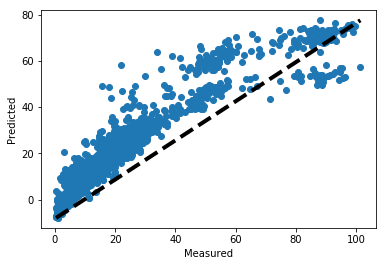

evaluation of model- SVR
MSE: 173.119638786
RMSE: 173.119638786
MAE: 7.88882775854
RANK: 102.998205332
ACC: 0.173888760317
R2: 0.639556008692


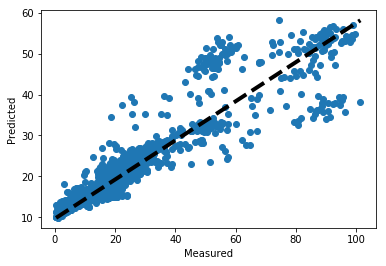

evaluation of model- SVR
MSE: 68.2254235154
RMSE: 68.2254235154
MAE: 4.58624906077
RANK: 21.9879876493
ACC: 0.738878245514
R2: 0.857951159482


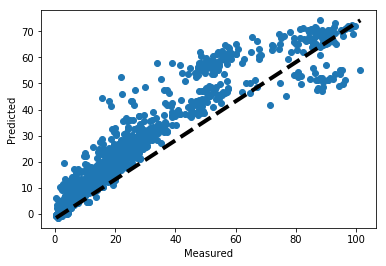

evaluation of model- DecisionTreeRegressor
MSE: 9.37251483541
RMSE: 9.37251483541
MAE: 1.4045878771
RANK: 9.65285468474
ACC: 0.904813509092
R2: 0.980485942094


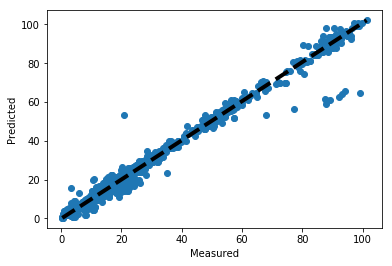

evaluation of model- RandomForestRegressor
MSE: 6.43614343223
RMSE: 6.43614343223
MAE: 1.27338691211
RANK: 9.55400195832
ACC: 0.909695531123
R2: 0.98659961837


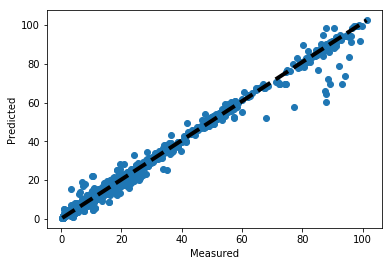

evaluation of model- ExtraTreesRegressor
MSE: 5.73079826026
RMSE: 5.73079826026
MAE: 1.24598285147
RANK: 9.1274461644
ACC: 0.917866288731
R2: 0.988068183293


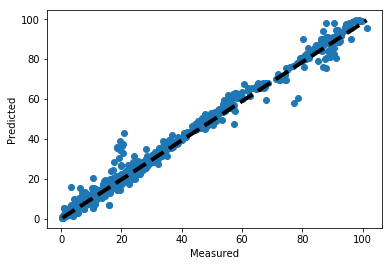

evaluation of model- AdaBoostRegressor
MSE: 26.9743893738
RMSE: 26.9743893738
MAE: 4.26014237087
RANK: 79.5933808472
ACC: 0.371867403546
R2: 0.94383793406


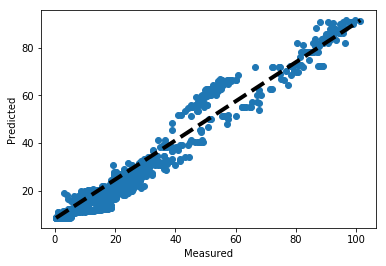

evaluation of model- BaggingRegressor
MSE: 4.99163239017
RMSE: 4.99163239017
MAE: 1.19153159171
RANK: 9.50911857678
ACC: 0.912699448041
R2: 0.989607164649


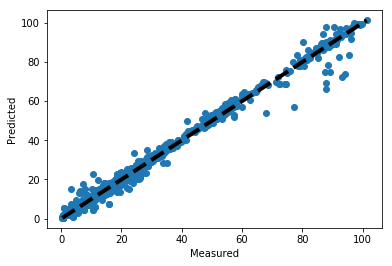

evaluation of model- GradientBoostingRegressor
MSE: 6.41222287544
RMSE: 6.41222287544
MAE: 1.60070127962
RANK: 10.8236814651
ACC: 0.882764977487
R2: 0.9866494222


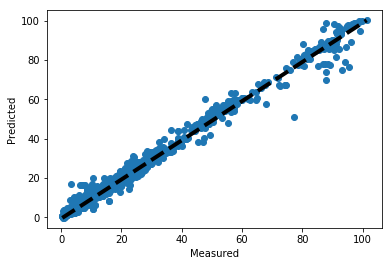

evaluation of model- XGBRegressor
MSE: 6.08868642419
RMSE: 6.08868642419
MAE: 1.57826234606
RANK: 10.5951063809
ACC: 0.885325901755
R2: 0.98732304173


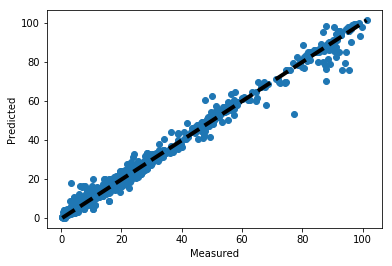

evaluation of model- MLPRegressor
MSE: 10.0600253912
RMSE: 10.0600253912
MAE: 2.24785549624
RANK: 17.2635766081
ACC: 0.841589554422
R2: 0.979054509759


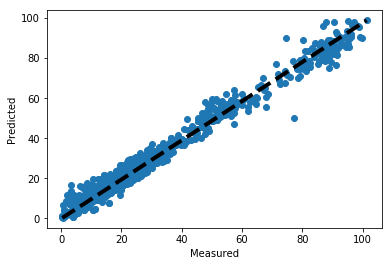

,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Comsumed Time
6,ExtraTreesRegressor,"{'bootstrap': False, 'criterion': 'mse', 'max_...",1,0.92,0.11
8,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",1,0.91,0.21
5,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",1,0.91,0.19
4,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",1,0.9,0.026
10,XGBRegressor,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.99,0.89,0.15
9,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.99,0.88,0.22
11,MLPRegressor,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.98,0.84,2.8
3,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.85,0.74,0.72
1,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.86,0.53,0.014
7,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.95,0.37,0.27


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR
from xgboost import XGBRegressor

estimator_list = [
    LinearRegression(),
    LinearSVR(),
    SVR(kernel='poly'),
    SVR(kernel='rbf'),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    MLPRegressor(solver='lbfgs')
]

# 定义模型字典
model_dict = {
    'LinearRegression': 'lr',
    'LinearSVR': 'svr_lr',
    'SVR': 'svr_rbf',
    'DecisionTreeRegressor': 'dtr',
    'RandomForestRegressor': 'rtr',
    'ExtraTreesRegressor': 'etr',
    'AdaBoostRegressor': 'abr',
    'BaggingRegressor': 'br',
    'GradientBoostingRegressor': 'gbr',
    'XGBRegressor': 'xgbr',
    'MLPRegressor': 'mlpr'
}

cv_split = ShuffleSplit(n_splits=6, train_size=0.75, test_size=0.25, random_state=142)
df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Comsumed Time']
df = pd.DataFrame(columns=df_columns)

row_index = 0
for estimator in estimator_list:
    model_name = estimator.__class__.__name__
    df.loc[row_index, 'Name'] = model_name
    df.loc[row_index, 'Parameters'] = str(estimator.get_params())
    
    #记录训练开始时间
    time_start=time.clock()

    # 训练
    estimator.fit(X_train, y_train)
    
    #记录训练结束时间
    time_end=time.clock()
    
    # 预测
    y_pred = estimator.predict(X_test)
    data_pred[model_dict[model_name]] = y_pred
    
    #评估
    print('evaluation of model-', estimator.__class__.__name__)
    scores = utils.evaluate(y_test, y_pred)
    
    #可视化
    utils.visualize(y_test, y_pred)
    
    df.loc[row_index, 'Train Accuracy Mean'] = estimator.score(X_train, y_train)
    df.loc[row_index, 'Test Accuracy Mean'] = scores['ACC']
    df.loc[row_index, 'Comsumed Time'] = time_end-time_start
    
    row_index += 1
df = df.sort_values(by='Test Accuracy Mean', ascending=False)
df

### 保存预测结果

In [12]:
data_pred.to_csv('./energy_predict_data/predict_result/data_pred_%s.csv' % utils.getType(type), index = False)